### Elevation profiles extracted from SRTM over Mt Baker compared with ICESat-2

In [1]:
import numpy as np
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import glob
from topolib import gda_lib
import topolib

### Read reference DEM

In [8]:
dem_fn = '/home/jovyan/data/srtm_elevation/SRTM3/cache/srtm_wa_subset.vrt'
dem = rasterio.open(dem_fn)

### Read ATL06 data

In [9]:
data_dir = '/home/jovyan/data/nsidc/**/'
ATL06_list = sorted(glob.glob(data_dir + "*.h5"))

### Sample DEM at ICESat-2 ATL06

In [10]:
ATL06_fn = ATL06_list[0]
dataset_dict={'land_ice_segments':['h_li',
                                   'delta_time',
                                   'longitude',
                                   'latitude'],
              'land_ice_segments/ground_track':['x_atc']}

ATL06_gdf = gda_lib.ATL06_2_gdf(ATL06_fn,dataset_dict)
ATL06_gdf = ATL06_gdf.to_crs(dem.crs)

In [11]:
poly = gda_lib.dem2polygon(dem_fn)

In [12]:
glas_gdf_aea_rgi = gpd.sjoin(ATL06_gdf, poly, op='intersects', how='inner')

In [15]:
points_xy = list(zip(glas_gdf_aea_rgi.geometry.x, glas_gdf_aea_rgi.geometry.y))

refdem_sample = []
for val in dem.sample(points_xy):
    refdem_sample.append(val[0])

### Plot data

In [16]:
glas_gdf_aea_rgi['srtm_height'] = refdem_sample

In [18]:
glas_gdf_aea_rgi['diff'] = glas_gdf_aea_rgi['srtm_height'] - glas_gdf_aea_rgi['h_li']

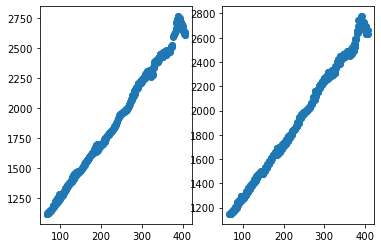

In [21]:
fit,ax = plt.subplots(1,2)
ax[0].scatter(glas_gdf_aea_rgi.index, glas_gdf_aea_rgi['h_li'])
ax[1].scatter(glas_gdf_aea_rgi.index, glas_gdf_aea_rgi['srtm_height']);

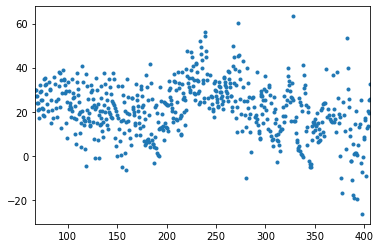

In [22]:
glas_gdf_aea_rgi['diff'].plot(marker='.', linestyle='none');

In [23]:
glas_gdf_aea_rgi['diff'].mean()

21.185592375756876

#### geoid offset